In [ ]:
!pip install googletrans==3.1.0a0
!pip install --upgrade diffusers transformers -q
!pip install DiffusionPipeline

ERROR: Could not find a version that satisfies the requirement DiffusionPipeline (from versions: none)
ERROR: No matching distribution found for DiffusionPipeline


##Importing Libraries.

In [ ]:
from googletrans import Translator
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers.pipelines.pipeline_utils import DiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2
from google.colab import userdata

##Language Translation

In [ ]:
def get_translation(text,lang):
  translator = Translator()
  translated_text = translator.translate(text, dest=lang)
  return translated_text.text

In [ ]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 50
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (2048,2048)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt3"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [ ]:
image_gen_model = DiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='Your hugging face token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

In [ ]:
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image

  0%|          | 0/50 [00:00<?, ?it/s]

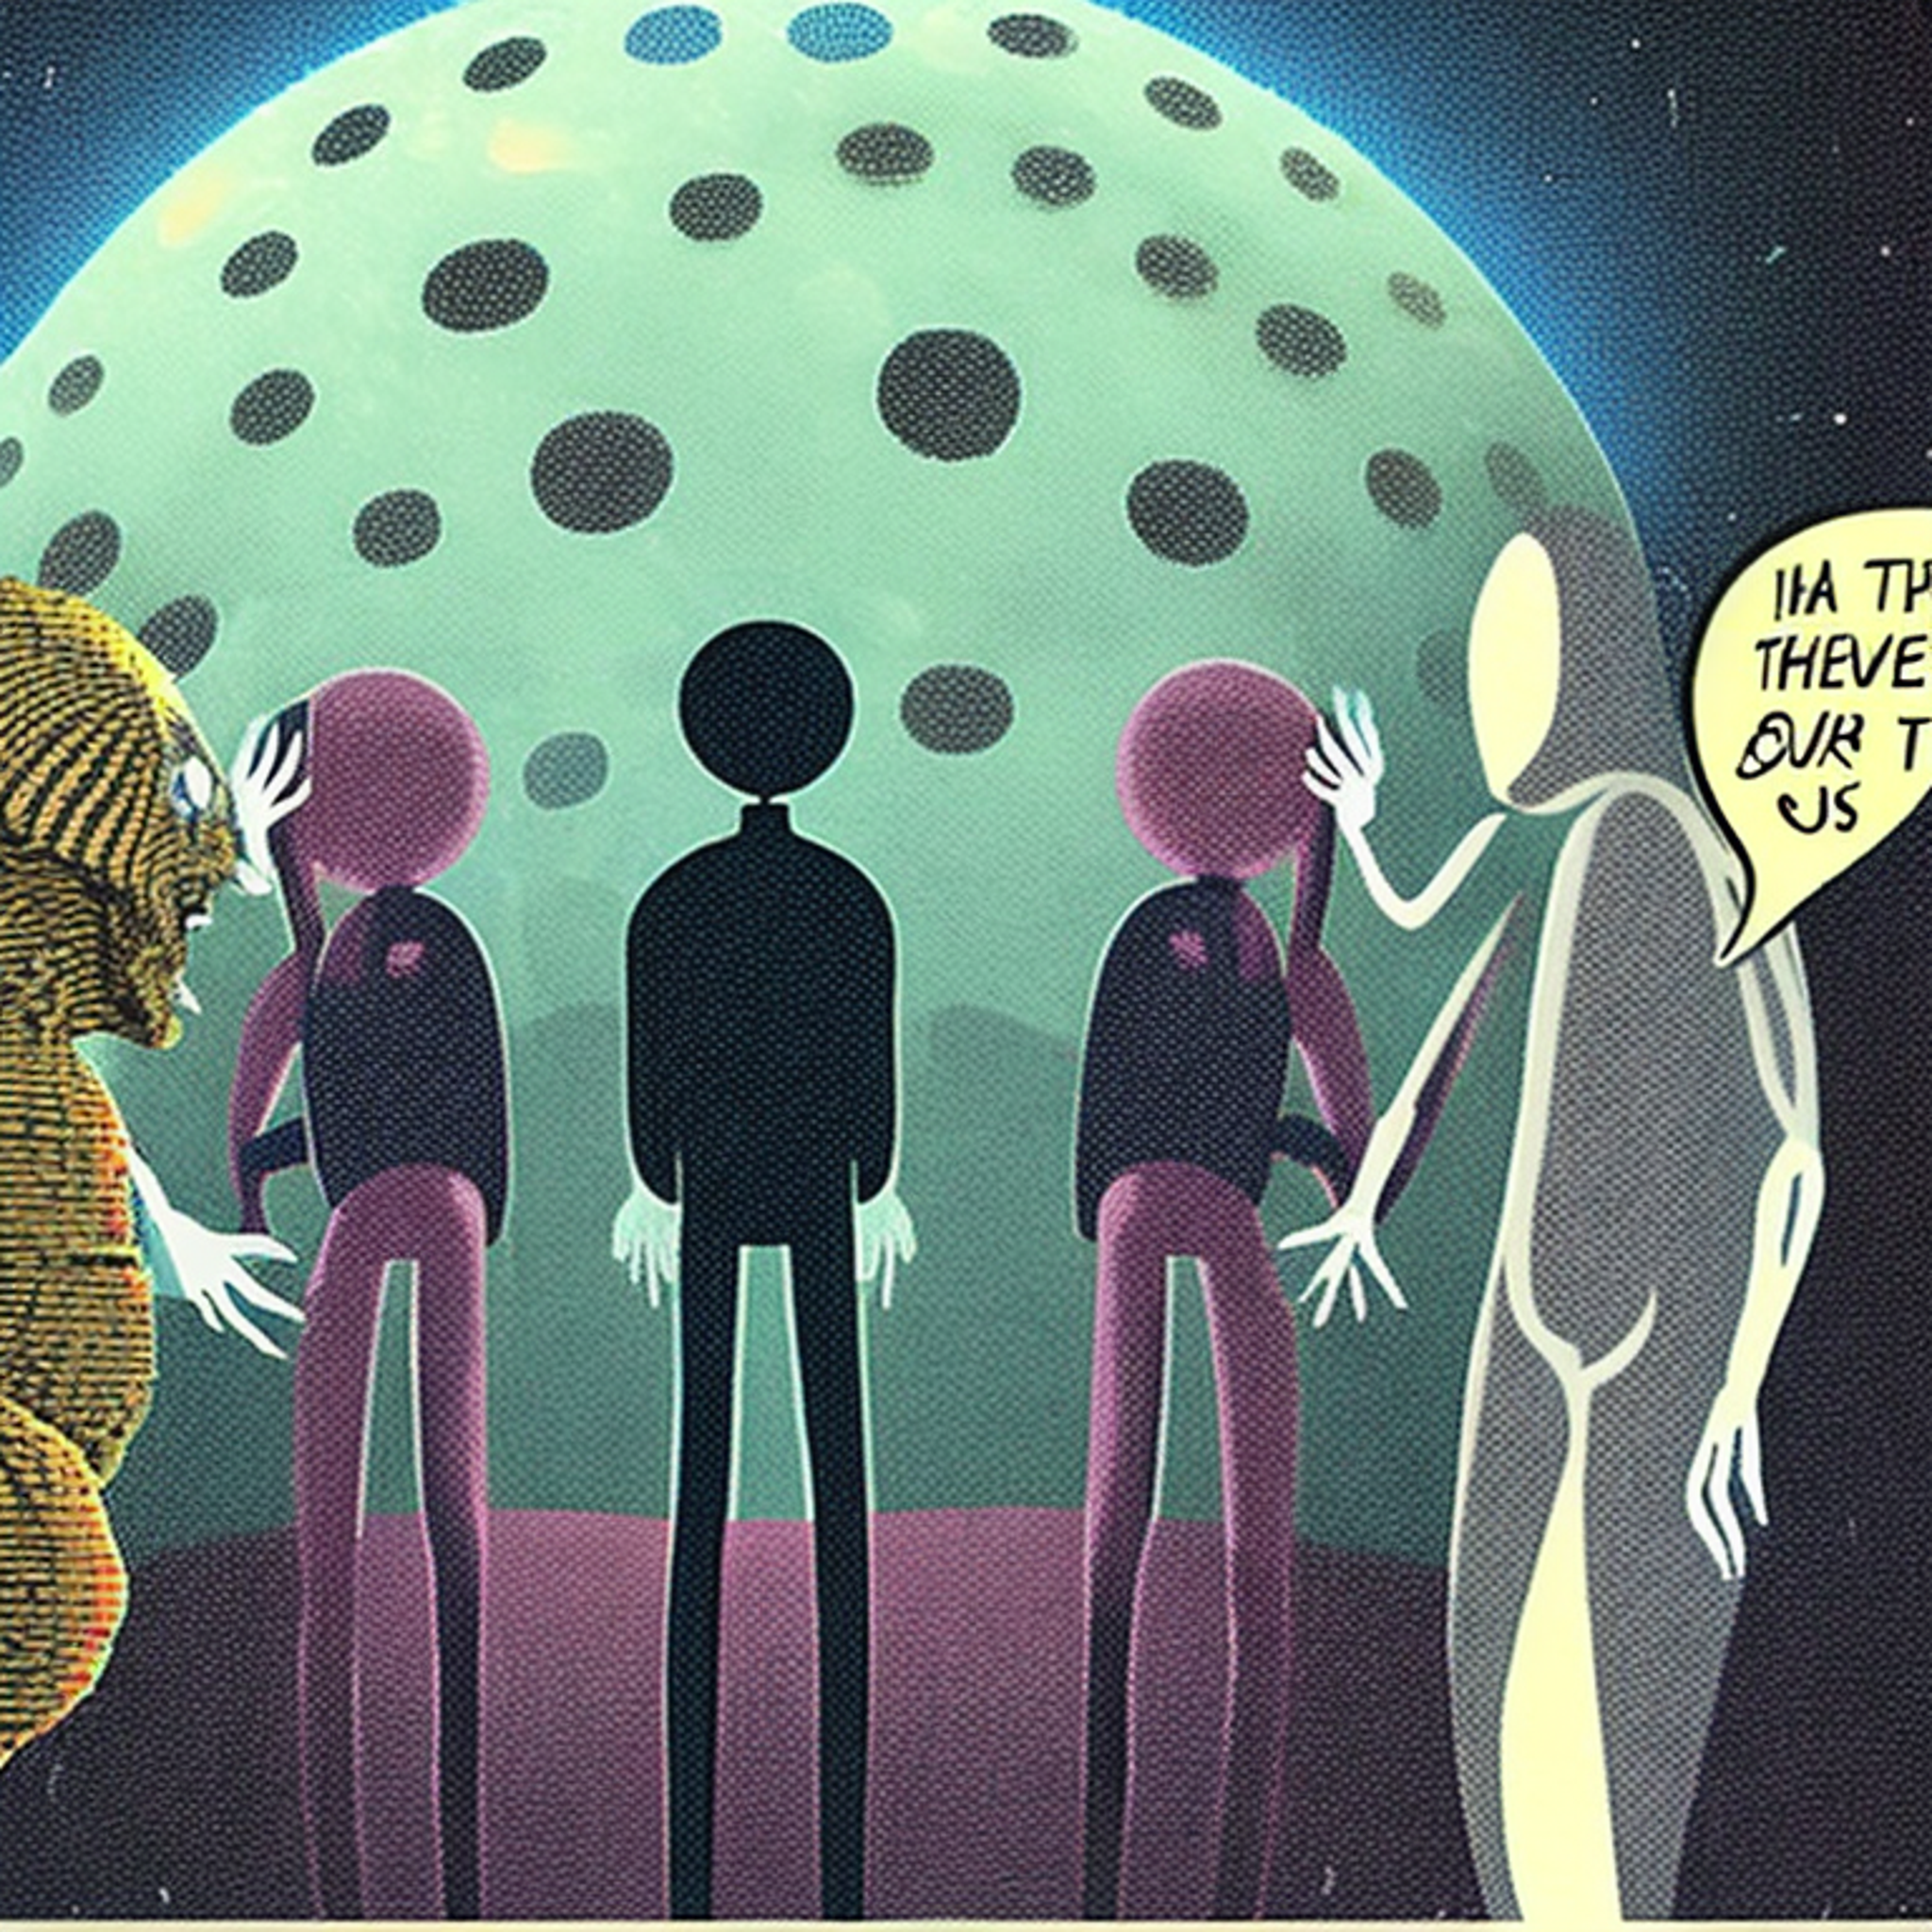

In [ ]:
translation = get_translation("Aliens on earth talking to man","en")
generate_image(translation, image_gen_model)